# Домашнее задание №3: Линейная регрессия

## Задание №1

Используется набор данных `Auto`.

1. Воспользуйтесь функцией `1m()` для подгонки простой линейной регрессии с `mpg` в качестве отклика и `horsepower` в качестве предиктора. Примените функцию `summary()` для вывода результатов на экран. Прокомментируйте эту выведенную информацию, ответитв на следующие вопросы:
  * Есть ли линейная связь между предиктором и откликом?
  * Насколько сильна связь между предиктором и откликом?
  * Каково направление связь между предиктором и откликом?
  * Чему равно модельное значение `mpg` при `horsepower = 98`? Каковы соответствующие 95%-ные доверительные интервалы для регрессионной прямой и для предсказанного значения?

In [61]:
install.packages('ISLR')
library(ISLR)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [82]:
data(Auto)
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [83]:
relation <- lm(mpg~horsepower, Auto)
summary(relation)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [87]:
predict(relation,data.frame(horsepower=c(98)),interval = 'confidence',level=0.95)

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [65]:
predict(relation,data.frame(horsepower=c(98)),interval = 'prediction',level=0.95)

,fit,lwr,upr
1,24.46708,14.8094,34.12476


  * Есть ли линейная связь между предиктором и откликом?

Да, т.к. коэффициенты и F-статистика значимы, есть сильная отрицательная линейная связь, уравнение линейной регрессии имеет вид:

`mpg = 39.935861 - 0.157845 * horsepower`

  * Насколько сильна связь между предиктором и откликом?

Сильная, $R^2 = 0.6059$.

  * Каково направление связь между предиктором и откликом?

Отрицательное.

  * Чему равно модельное значение `mpg` при `horsepower = 98`?
  
`24.46708`
  
  * Каковы соответствующие 95%-ные доверительные интервалы для регрессионной прямой и для предсказанного значения?

95%-ный доверительный интервал для регрессионной прямой `[23.97308;	24.96108]`

Для предсказанного значения `[14.8094;	34.12476]`


2. Постройте график зависимости отклика от предиктора вместе с набором данных.

`geom_smooth()` using formula = 'y ~ x'


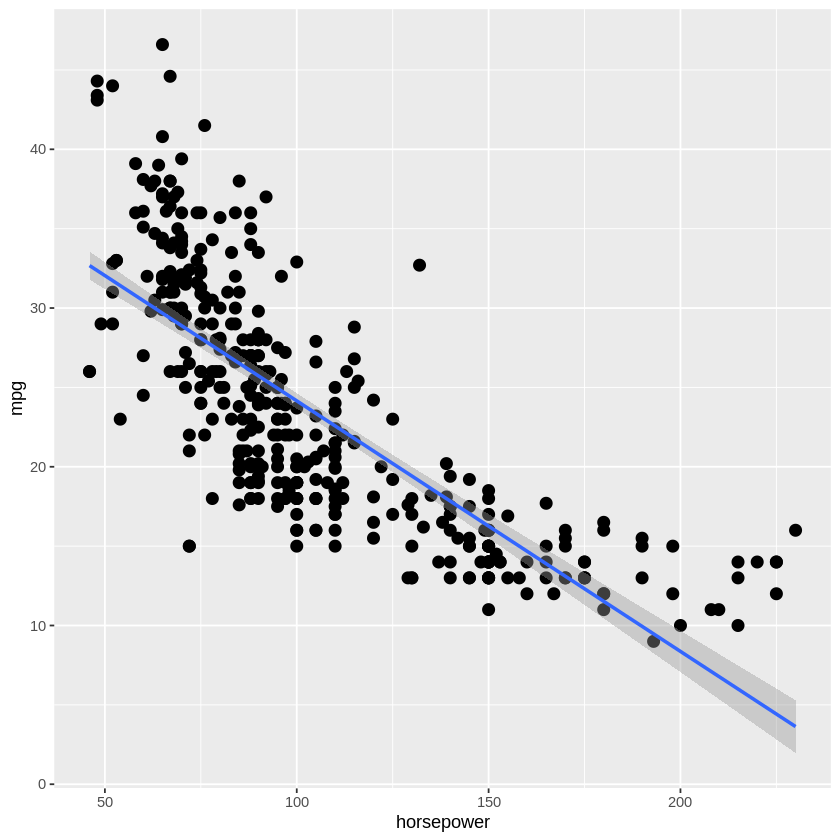

In [66]:
ggplot(Auto,aes(horsepower,mpg))+geom_point(size=3)+geom_smooth(method='lm',level=.95)

3. Воспользуйтесь функцией `plot()` для построения диагностических графиков для модели, подогнанной по методу наименьших квадратов. Прокомментируйте любые обнаруженные Вами проблемы с этой моделью.

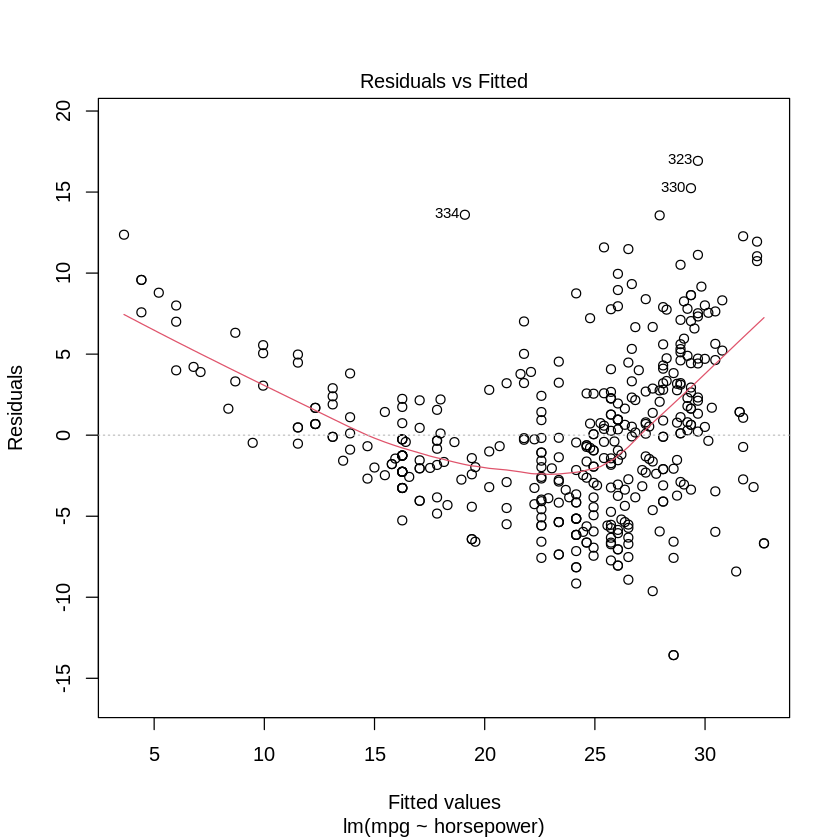

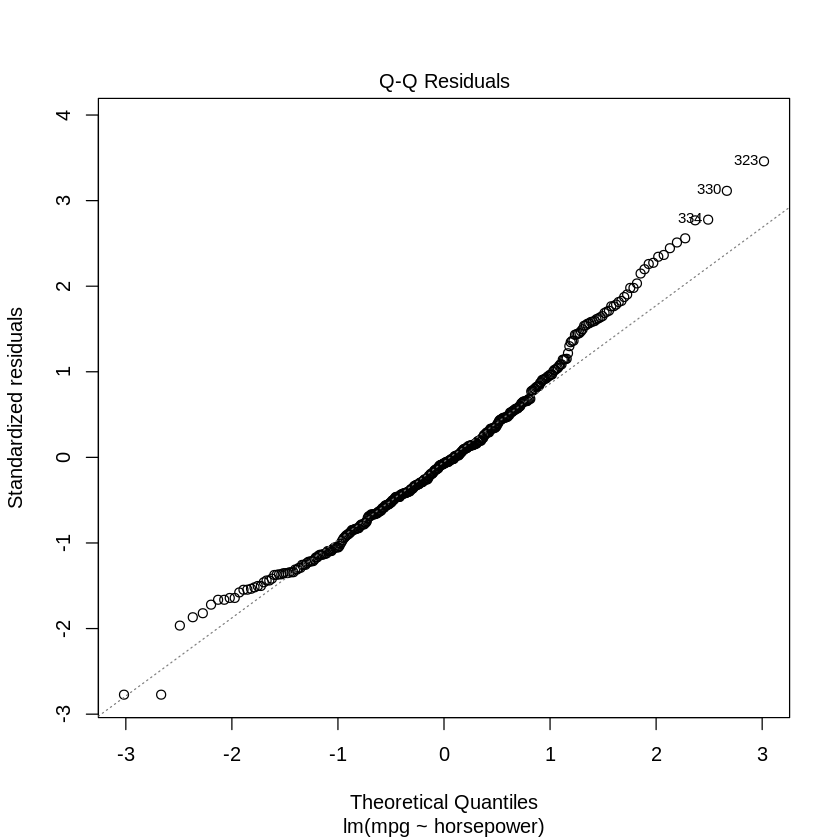

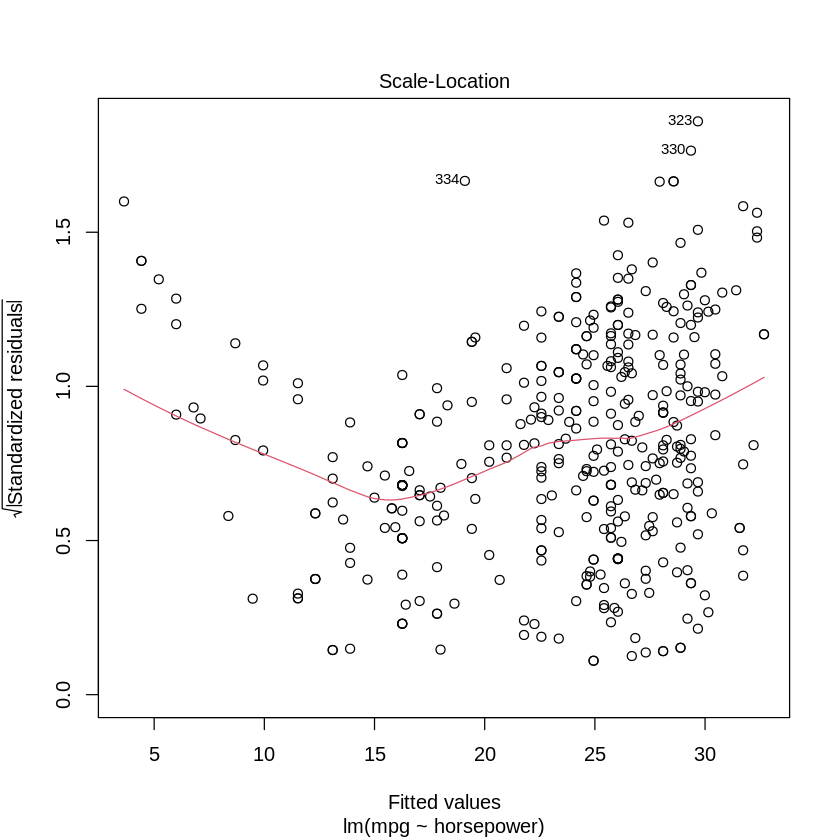

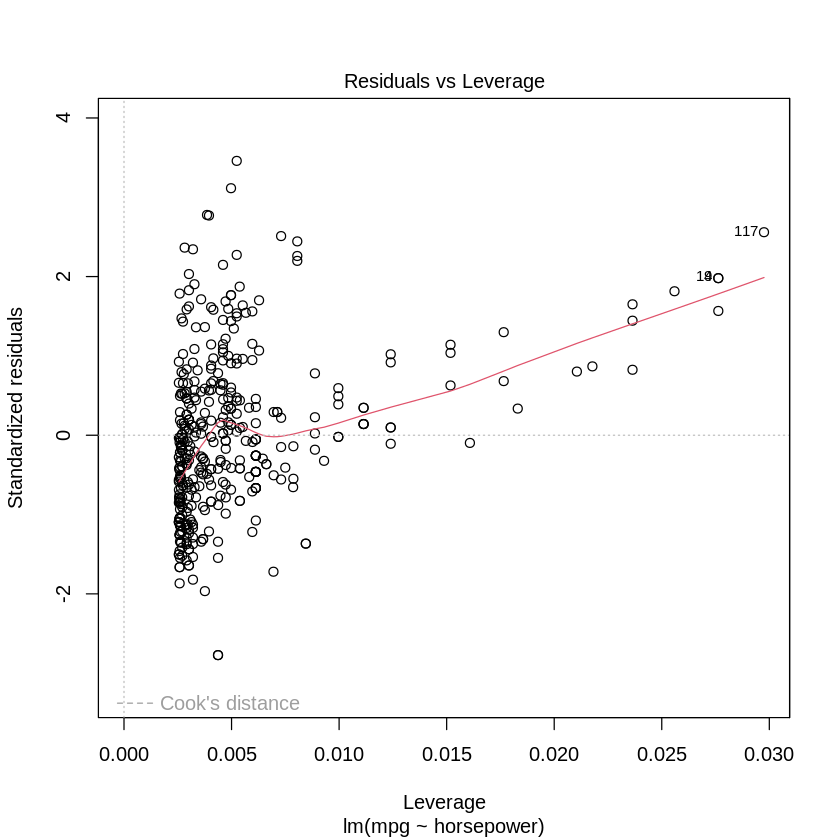

In [67]:
plot(relation)

* Наблюдается гетероскедастичность модели.
* Распределение остатков отличается от нормального (избыток больших значений и недостаток малых).
* Значимых выбросов нет.

## Задание №2

Используется набор данных `Auto`.

1. Постройте матрицу диаграмм рассеяния, которая включает все переменные из этой таблицы данных. Для этого воспользуйтесь функцией `pairs()`. Изучите справку по данной функции. Прокомментируйте полученный график.

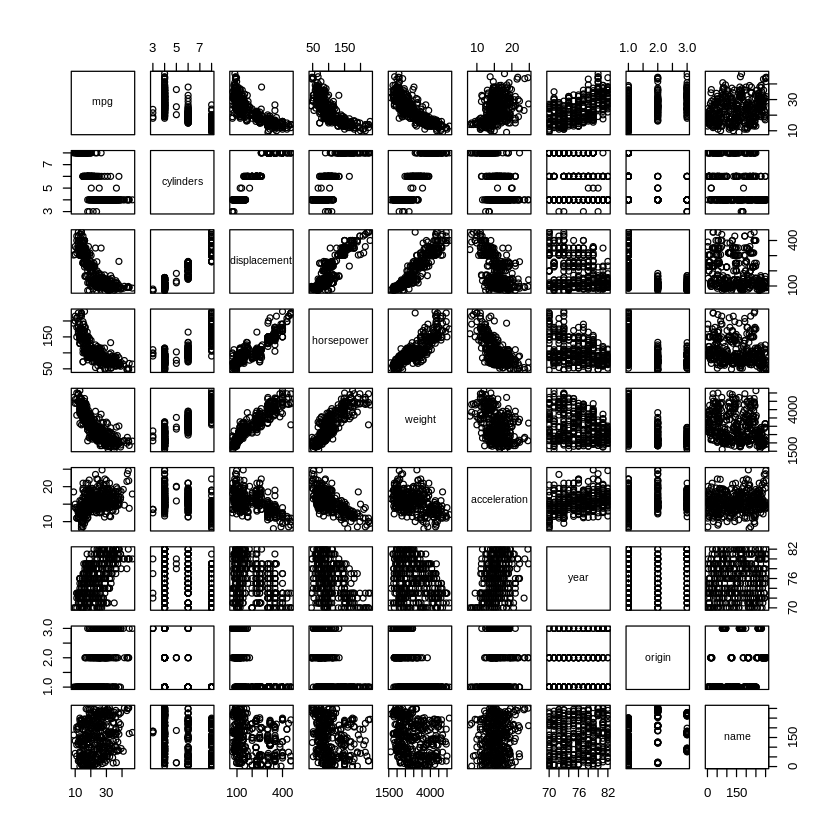

In [68]:
pairs(Auto)

Существует линейная зависимость между переменной отклика `mpg` и переменными-предикторами `displacement`,`horsepower`,`weight`, однако эти переменные-предикторы достаточно сильно коррелируют между собой.

Таким образом множественная линейная регрессия для этих данных не допустима.


2. Вычислите корреляционную матрицу для всех переменных, используя функцию `сог()`. Вам потребуется исключить из расчетов качественную переменную `name`.

In [69]:
cor(Auto[,names(Auto)[-length(names(Auto))]])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


3. Воспользуйтесь функцией `lm()` для подгонки множественной линейной регрессии с `mpg` в качестве отклика и всех других переменных, за исключением `name`, в качестве предикторов. Примените функцию `summary()` для вывода результатов на экран. Прокомментируйте эту выведенную информацию, ответитв на следующие вопросы:
  * Имеется ли связь между предикторами и откликом?
  * Какие предикторы проявляют статистически значимую связь с откликом?
  * О чем говорит коэффициент переменной `year`?

In [70]:
multiple <- lm(mpg~., Auto[,names(Auto)[-length(names(Auto))]])
summary(multiple)


Call:
lm(formula = mpg ~ ., data = Auto[, names(Auto)[-length(names(Auto))]])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


  * Имеется ли связь между предикторами и откликом?

Да.
  * Какие предикторы проявляют статистически значимую связь с откликом?

`weidht`, `year`, `origin`, `displacement`
  * О чем говорит коэффициент переменной `year`?

О сильной прямой зависимости, при единичном изменении `year`, отклик `mpg` увеличится на 0.750773.

4. Воспользуйтесь функцией `plot()` для построения диагностических графиков для этой линейной регрессионной модели. Прокомментируйте любые обнаруженные вами проблемы с этой моделью. Указывают ли остатки на наличие каких-либо необычно больших выбросов? Указывает ли график значений показателя разбалансировки на наличие наблюдений с необычно высокой разбалансировкой?

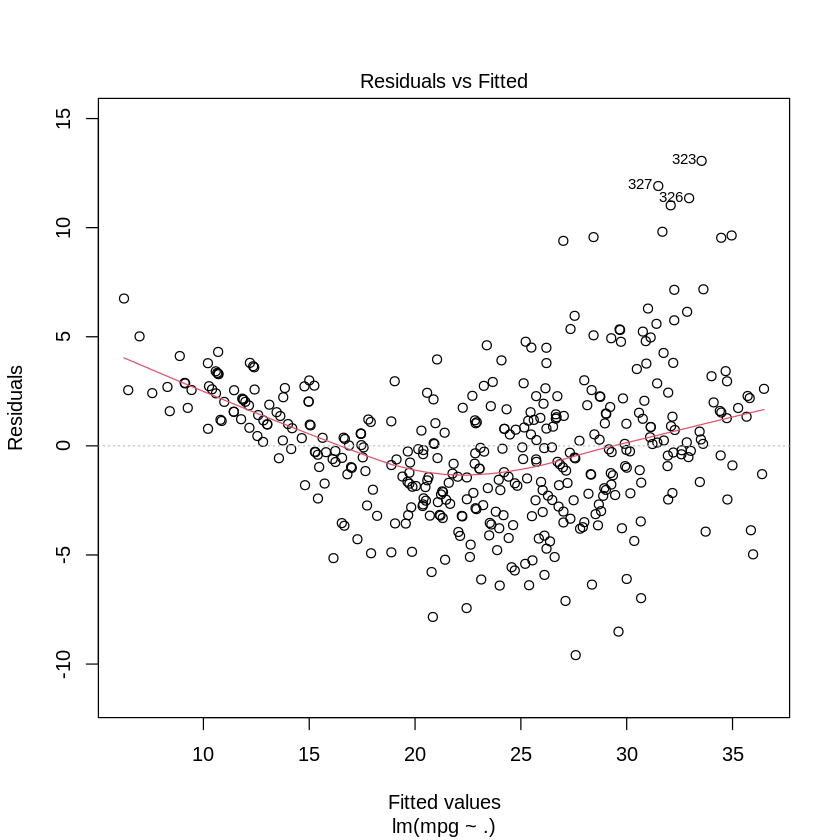

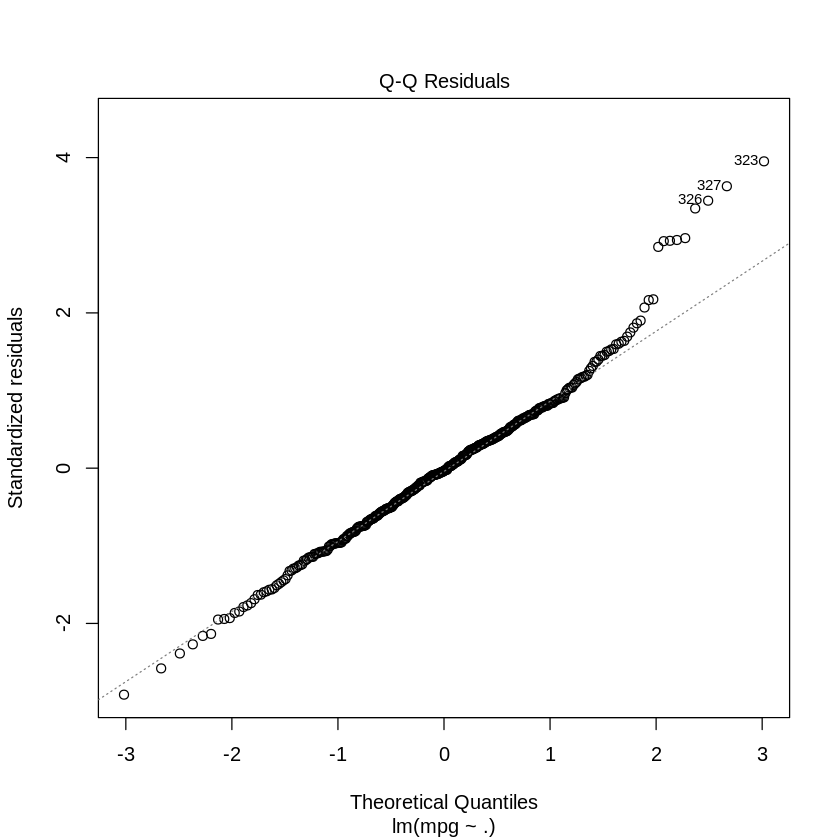

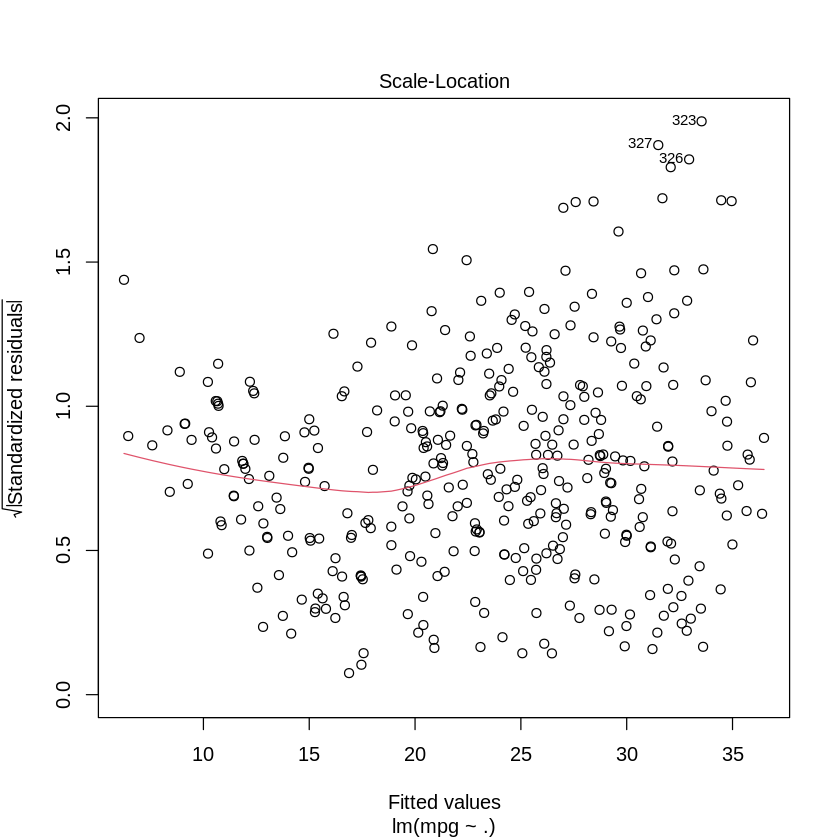

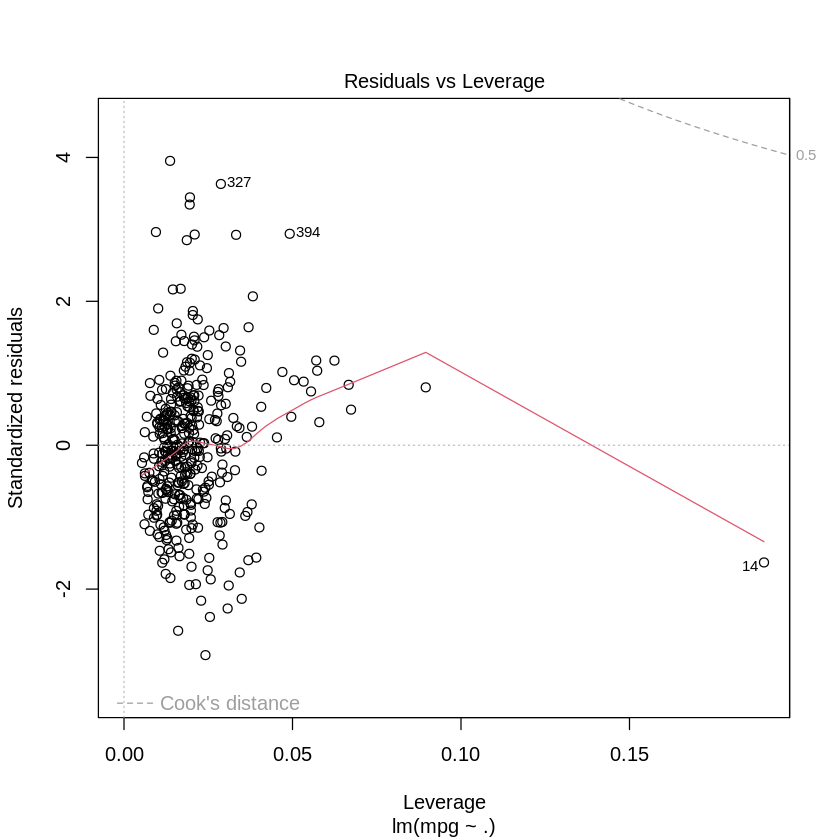

In [71]:
plot(multiple)

* Наблюдается гетероскопичность.
* Распределение остатков отличается от нормального (избыток больших значений).
* Выбросов нет.
* Есть наблюдение с высокой разбалансировкой.

5. Используйте символы `*` и `:` для подгонки регрессионных моделей с эффектами взаимодействия. Являются ли какие-либо взаимодействия статистически значимыми?

In [72]:
multiple <- lm(mpg~horsepower*cylinders+displacement*year+origin*acceleration+weight, Auto)
summary(multiple)


Call:
lm(formula = mpg ~ horsepower * cylinders + displacement * year + 
    origin * acceleration + weight, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6794 -1.4462 -0.0992  1.1730 13.0922 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.082e+01  9.210e+00  -1.175 0.240754    
horsepower           -2.477e-01  3.393e-02  -7.301 1.68e-12 ***
cylinders            -3.101e+00  5.264e-01  -5.892 8.41e-09 ***
displacement          1.201e-01  3.762e-02   3.193 0.001526 ** 
year                  1.027e+00  9.495e-02  10.813  < 2e-16 ***
origin               -3.333e+00  1.617e+00  -2.062 0.039930 *  
acceleration         -5.366e-01  1.811e-01  -2.963 0.003242 ** 
weight               -3.783e-03  6.137e-04  -6.165 1.80e-09 ***
horsepower:cylinders  2.965e-02  4.438e-03   6.681 8.44e-11 ***
displacement:year    -1.674e-03  5.015e-04  -3.338 0.000927 ***
origin:acceleration   2.610e-01  9.898e-02   2.637 0.008715 ** 


In [73]:
multiple <- lm(mpg~cylinders:weight+displacement:origin+horsepower:year+acceleration, Auto)
summary(multiple)


Call:
lm(formula = mpg ~ cylinders:weight + displacement:origin + horsepower:year + 
    acceleration, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7957  -3.0105  -0.2656   2.3124  16.6469 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.638e+01  2.856e+00  12.739  < 2e-16 ***
acceleration        -5.785e-02  1.211e-01  -0.478  0.63308    
cylinders:weight    -5.133e-04  5.166e-05  -9.937  < 2e-16 ***
displacement:origin  1.030e-02  3.404e-03   3.027  0.00263 ** 
horsepower:year     -7.145e-04  2.347e-04  -3.044  0.00249 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.533 on 387 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6628 
F-statistic: 193.1 on 4 and 387 DF,  p-value: < 2.2e-16


Статистически значимо взаимодействие с pvalue << 0.05: `horsepower:cylinders`, `displacement:year`, `cylinders:weight`.

Статистически значимо взаимодействие с pvalue < 0.05: `origin:acceleration`, `displacement:origin`,
`horsepower:year`.

Возможны другие исследуемые комбинации.


6. Попробуйте применить несколько разных преобразований к переменным, таких как $ \log X $, $ \sqrt X $, $ X^2 $. Прокомментируйте свои находки.

In [74]:
multiple <- lm(mpg~sqrt(cylinders)+I(displacement^2)+log(horsepower)+log(acceleration) +weight+year+origin, Auto)
summary(multiple)



Call:
lm(formula = mpg ~ sqrt(cylinders) + I(displacement^2) + log(horsepower) + 
    log(acceleration) + weight + year + origin, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6605 -1.9139 -0.1281  1.6556 12.3032 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.000e+01  1.052e+01   3.804 0.000166 ***
sqrt(cylinders)   -3.005e+00  1.151e+00  -2.611 0.009369 ** 
I(displacement^2)  5.321e-05  9.627e-06   5.527 6.03e-08 ***
log(horsepower)   -9.983e+00  1.477e+00  -6.760 5.15e-11 ***
log(acceleration) -4.021e+00  1.624e+00  -2.475 0.013747 *  
weight            -4.422e-03  6.520e-04  -6.783 4.46e-11 ***
year               7.332e-01  4.678e-02  15.674  < 2e-16 ***
origin             1.287e+00  2.408e-01   5.344 1.57e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.056 on 384 degrees of freedom
Multiple R-squared:  0.8494,	Adjusted R-squared:  0.8467 
F-statistic: 30

Преобразования `displacement^2` и `log(horsepower)` делают предикторы статистически значимыми с pvalue << 0.05.

А преобразования `log(cylinders)`/`sqrt(cylinders)` и `log(acceleration)`/`sqrt(acceleration)` делают предикторы статистически значимыми с pvalue < 0.05.


## Задание №3

Используется набор данных `Carseats`. Для этого необходимо установить пакет `ISLR`.

1. Постройте множественную регрессионную модель для предсказания `Sales` на основе `Price`, `Urban` и `US`.

In [75]:
data(Carseats)
relation <- lm(Sales~Price+Urban+US,Carseats)

2. Приведите интерпретацию каждого коэффициента в модели. Будьте осторожны — некоторые переменные являются качественными!

In [76]:
summary(relation)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


3. Запишите модель в виде уравнения (помня о необходимости должным образом обходиться с качественными переменными).

$$Sales = 13.043469 - 0.054459 \cdot Price - 0.021916 \cdot UrbanYes + 1.200573 \cdot USYes $$

4. Для каких из предикторов вы можете отклонить нулевую гипотезу $ H_0: \beta_j = 0 $?

`Price` и `USYes`, т.к. pvalue < $\alpha$

5. Учитывая свой ответ на предыдущий вопрос, постройте модель только с теми предикторами, для которых было было обнаружено свидетельство в пользу их связи с откликом.

In [77]:
relation <- lm(Sales~Price+US,Carseats)
summary(relation)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


6. Насколько хорошо модели из п. 1 и 5 описывают данные?

`p-value` для `F-statistic` для моделей из п. 1 и 5 меньше 0.05, т.е. модели имеют смысл для описания `Sales`, но объясняют только 23.93% дисперсии.

7. Используя модель из п. 5, рассчитайте 95%-ные доверительные интервалы для каждого коэффициента.

In [78]:
confint(relation, level = 0.95)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


8. Имеются ли указания на наличие выбросов или наблюдений с высокой разбалансировкой в модели из п. 5?

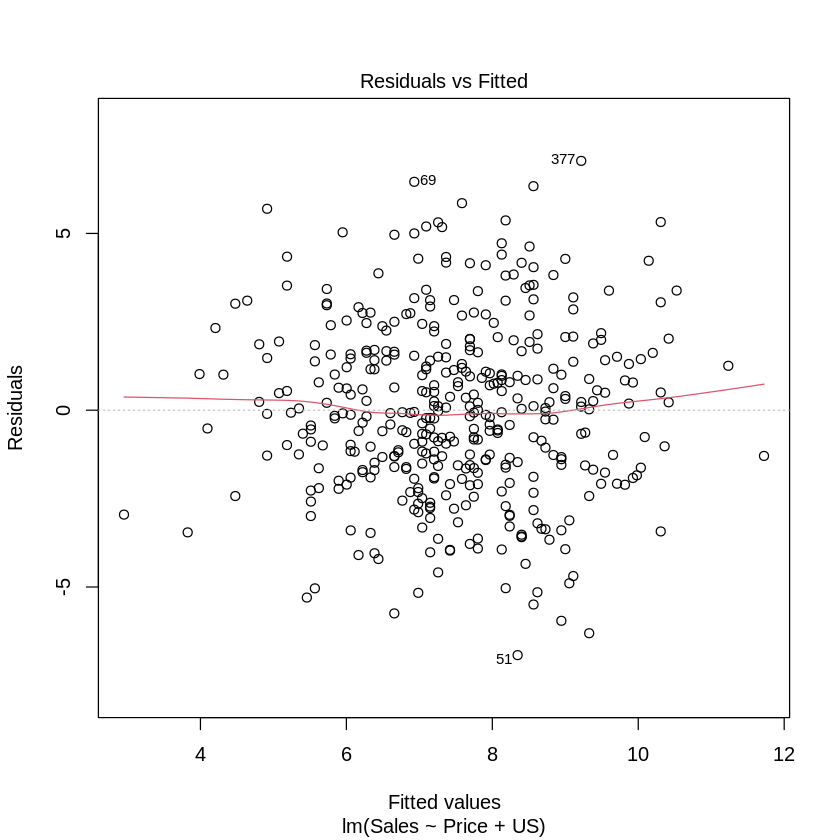

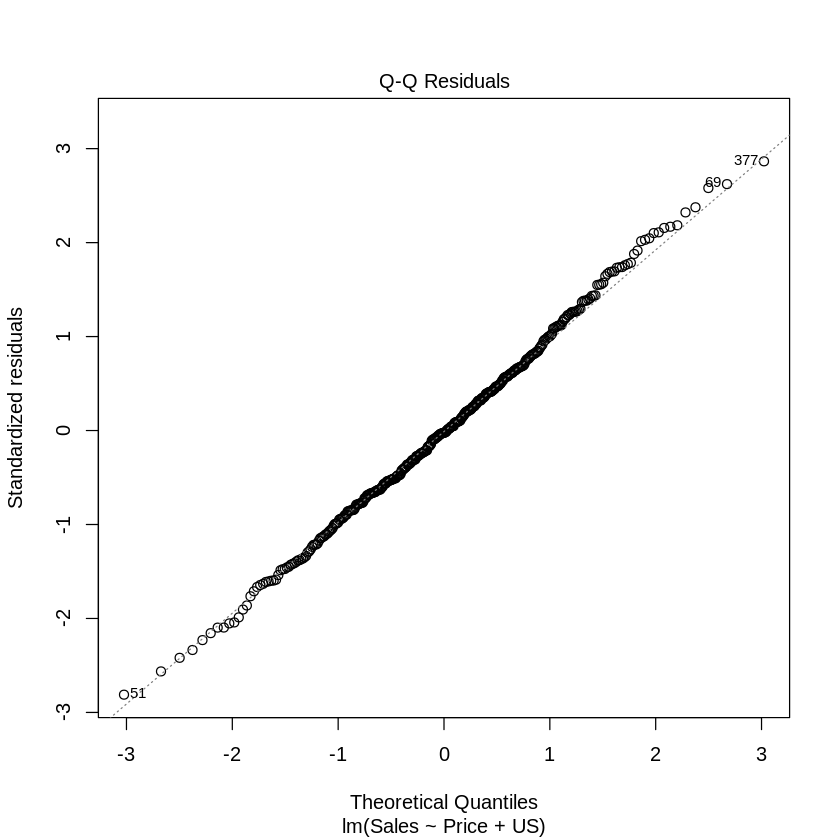

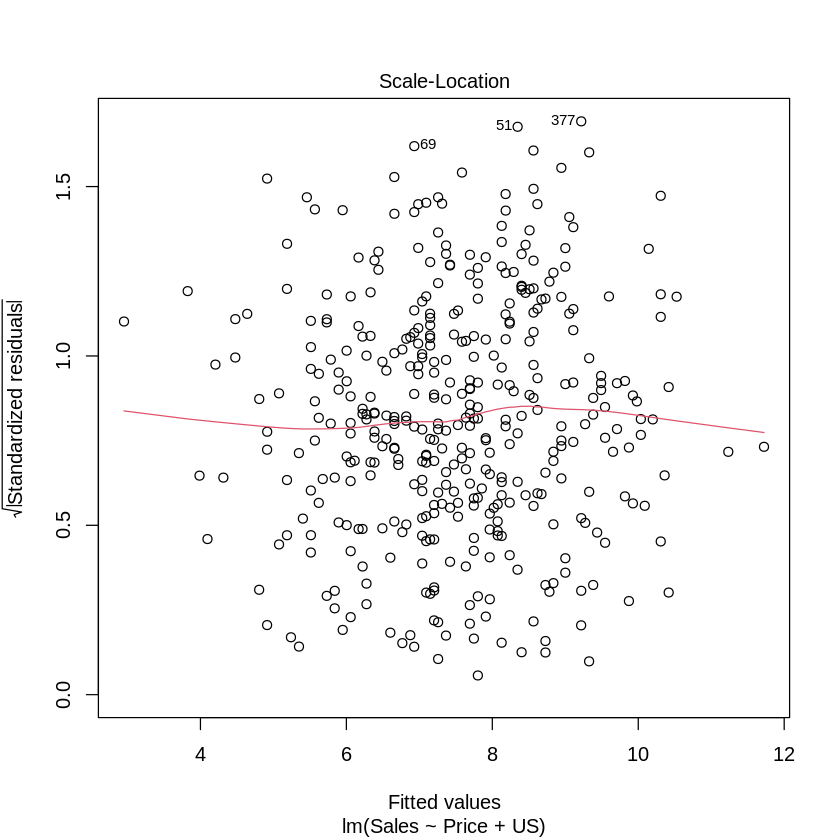

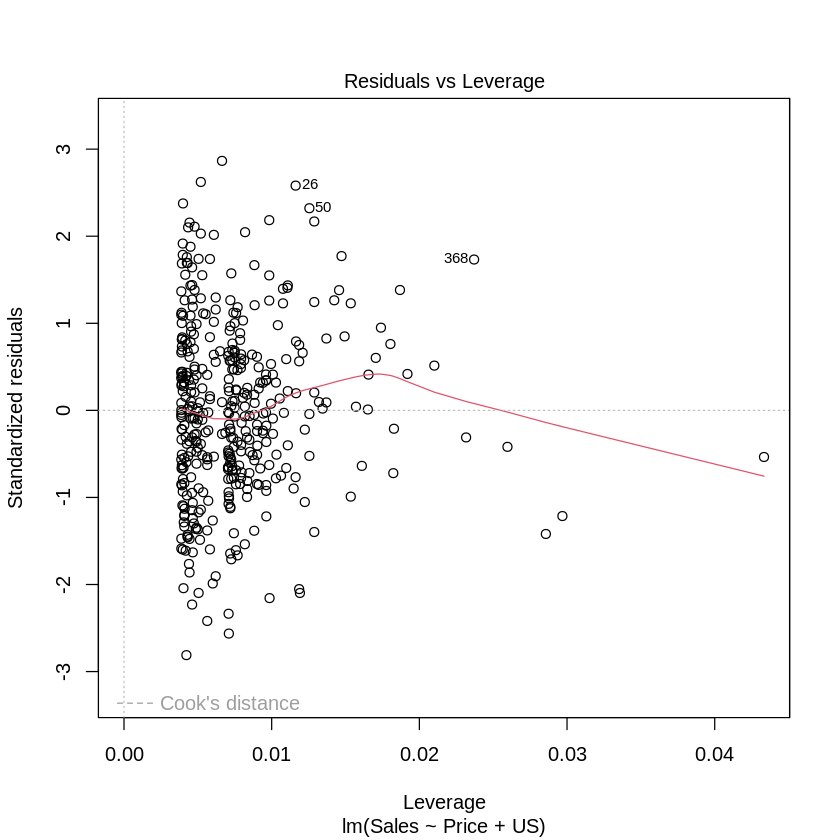

In [79]:
plot(relation)

* Нет указаний на наличие выбросов.
* Наблюдение с высокой разбалансировкой (на последнем рисунке справа).
